# ***SCRAPING DATA***

In [ ]:
!pip install google_play_scraper

In [ ]:
from google_play_scraper import app, reviews
import pandas as pd
import numpy as np

In [ ]:
from google_play_scraper import reviews, Sort

app_id = 'com.michatapp.im'

def get_reviews(app_id, lang='id', count=2000, sort=Sort.NEWEST, filter_score_with=None, filter_device_with=None, continuation_token=None):
    try:
        result, continuation_token = reviews(
            app_id,
            lang=lang,
            country='id',
            sort=sort,
            count=count,
            filter_score_with=filter_score_with,
            filter_device_with=filter_device_with,
            continuation_token=continuation_token
        )

        return result, continuation_token
    except Exception as e:
        print("Error:", e)
        return None, None

reviews, continuation_token = get_reviews(app_id)

if reviews is not None:
    print("Jumlah ulasan:", len(reviews))
    if len(reviews) > 0:
        print("Contoh ulasan:")
        print(reviews[0])
else:
    print("Tidak dapat mengambil ulasan.")

Jumlah ulasan: 2000
Contoh ulasan:
{'reviewId': '825d3945-968e-40be-ae81-fa93dd188594', 'userName': 'RayN -H', 'userImage': 'https://play-lh.googleusercontent.com/a-/ALV-UjUZ4D7S8GA2u06LpjeZG4JJBiAgHDCaMuQVn9ms7iBi01NQOjE', 'content': 'ok y', 'score': 5, 'thumbsUpCount': 0, 'reviewCreatedVersion': '1.4.695', 'at': datetime.datetime(2026, 1, 31, 18, 11, 34), 'replyContent': None, 'repliedAt': None, 'appVersion': '1.4.695'}


In [ ]:
import csv

def export_to_csv(reviews, file_name='hasil_scraper_ulasan_app_michat.csv'):
    if reviews:
        fieldnames = ['Review ID', 'Username', 'Rating', 'Review Text', 'Date']

        with open(file_name, mode='w', newline='', encoding='utf-8') as csv_file:
            writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
            writer.writeheader()

            for review in reviews:
                writer.writerow({
                    'Review ID': review['reviewId'],
                    'Username': review['userName'],
                    'Rating': review['score'],
                    'Review Text': review['content'],
                    'Date': review['at']
                })

        print(f"Data berhasil diekspor ke '{file_name}'")
    else:
        print("Tidak ada data ulasan untuk diekspor.")

export_to_csv(reviews)

Data berhasil diekspor ke 'hasil_scraper_ulasan_app_michat.csv'


In [ ]:
import pandas as pd

df = pd.read_csv('hasil_scraper_ulasan_app_michat.csv')
df.head()

Review ID                       Username  \
0  825d3945-968e-40be-ae81-fa93dd188594                        RayN -H   
1  80a0f3f3-a51a-4b63-9c82-2a75d5880471                      Maz Adhie   
2  8b5eb827-826b-4180-8195-8eda269158e4  Wahyu Pur Setiawan18 Wahyu MH   
3  d3e27406-ee5d-469c-90b2-3a0eefff34ce                     Pirman Sah   
4  13a7a229-3265-441b-b6ac-8bde6b5bbeec                     Dawi Anjau   

   Rating       Review Text                 Date  
0       5              ok y  2026-01-31 18:11:34  
1       5          good job  2026-01-31 18:03:14  
2       1  kebanyakan iklan  2026-01-31 17:58:19  
3       1          ga jelas  2026-01-31 17:56:04  
4       1    apk open Bo🗿🗿🗿  2026-01-31 17:24:06

# ***PRAPROCESSING DATA***

In [ ]:
import pandas as pd

data = pd.read_csv('hasil_scraper_ulasan_app_michat.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review ID    2000 non-null   object
 1   Username     2000 non-null   object
 2   Rating       2000 non-null   int64 
 3   Review Text  2000 non-null   object
 4   Date         2000 non-null   object
dtypes: int64(1), object(4)
memory usage: 78.3+ KB


In [ ]:
data.head(5)

Review ID                       Username  \
0  825d3945-968e-40be-ae81-fa93dd188594                        RayN -H   
1  80a0f3f3-a51a-4b63-9c82-2a75d5880471                      Maz Adhie   
2  8b5eb827-826b-4180-8195-8eda269158e4  Wahyu Pur Setiawan18 Wahyu MH   
3  d3e27406-ee5d-469c-90b2-3a0eefff34ce                     Pirman Sah   
4  13a7a229-3265-441b-b6ac-8bde6b5bbeec                     Dawi Anjau   

   Rating       Review Text                 Date  
0       5              ok y  2026-01-31 18:11:34  
1       5          good job  2026-01-31 18:03:14  
2       1  kebanyakan iklan  2026-01-31 17:58:19  
3       1          ga jelas  2026-01-31 17:56:04  
4       1    apk open Bo🗿🗿🗿  2026-01-31 17:24:06

In [ ]:
df = pd.DataFrame(data[['Date', 'Username', 'Rating', 'Review Text']])
df.head(5)

Date                       Username  Rating  \
0  2026-01-31 18:11:34                        RayN -H       5   
1  2026-01-31 18:03:14                      Maz Adhie       5   
2  2026-01-31 17:58:19  Wahyu Pur Setiawan18 Wahyu MH       1   
3  2026-01-31 17:56:04                     Pirman Sah       1   
4  2026-01-31 17:24:06                     Dawi Anjau       1   

        Review Text  
0              ok y  
1          good job  
2  kebanyakan iklan  
3          ga jelas  
4    apk open Bo🗿🗿🗿

***PROSES HAPUS DATA DUPLIKAT***

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review ID    2000 non-null   object
 1   Username     2000 non-null   object
 2   Rating       2000 non-null   int64 
 3   Review Text  2000 non-null   object
 4   Date         2000 non-null   object
dtypes: int64(1), object(4)
memory usage: 78.3+ KB


In [ ]:
df.drop_duplicates(subset="Review Text", keep='first', inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review ID    2000 non-null   object
 1   Username     2000 non-null   object
 2   Rating       2000 non-null   int64 
 3   Review Text  2000 non-null   object
 4   Date         2000 non-null   object
dtypes: int64(1), object(4)
memory usage: 78.3+ KB


In [ ]:
data.head(10)

Review ID                       Username  \
0  825d3945-968e-40be-ae81-fa93dd188594                        RayN -H   
1  80a0f3f3-a51a-4b63-9c82-2a75d5880471                      Maz Adhie   
2  8b5eb827-826b-4180-8195-8eda269158e4  Wahyu Pur Setiawan18 Wahyu MH   
3  d3e27406-ee5d-469c-90b2-3a0eefff34ce                     Pirman Sah   
4  13a7a229-3265-441b-b6ac-8bde6b5bbeec                     Dawi Anjau   
5  5c4426ec-f48d-488d-9235-c0a805e8390c                       Romadhon   
6  520f483c-3fbb-4a7e-91b4-48ec2af636a0                 Samuel Yohanes   
7  4446ac03-b105-4fff-88e7-5fc7a61d68e1                      Doni Doni   
8  51efca36-a3dc-4636-8e90-49dd5e5d236f                  Nazar Affandi   
9  e3c48bf9-7b45-4a03-81d3-de1259e91181            Al-faisah Al-faisah   

   Rating                                        Review Text  \
0       5                                               ok y   
1       5                                           good job   
2       1                                   kebanyakan iklan   
3       1                                           ga jelas   
4       1                                     apk open Bo🗿🗿🗿   
5       4  kenapa mencari lokasi yg terdekat gak bisa,yg ...   
6       1                      maaf terlampau bnyk iklan nya   
7       5                                                oke   
8       1                        aplikasi hanya untuk menipu   
9       5                                         Keren Sihh   

                  Date  
0  2026-01-31 18:11:34  
1  2026-01-31 18:03:14  
2  2026-01-31 17:58:19  
3  2026-01-31 17:56:04  
4  2026-01-31 17:24:06  
5  2026-01-31 17:20:10  
6  2026-01-31 16:33:27  
7  2026-01-31 16:30:34  
8  2026-01-31 16:28:18  
9  2026-01-31 16:03:38

***WORLDCLAUD SEBELUM PREPROCESSING***

In [ ]:
import re
import string
import nltk

# Fungsi untuk menghapus emoji
def remove_emoji(tweet):
    if tweet is not None and isinstance(tweet, str):
        emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F700-\U0001F77F"  # alchemical symbols
            u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
            u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
            u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
            u"\U0001FA00-\U0001FA6F"  # Chess Symbols
            u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
            u"\U0001F004-\U0001F0CF"  # Additional emoticons
            u"\U0001F1E0-\U0001F1FF"  # flags
        "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', tweet)
    else:
        return tweet

# Fungsi untuk menghapus simbol
def remove_symbols(tweet):
    if tweet is not None and isinstance(tweet, str):
        tweet = re.sub(r'[^a-zA-Z0-9\s]', '', tweet)
        return tweet

# Fungsi untuk menghapus angka
def remove_numbers(tweet):
    if tweet is not None and isinstance(tweet, str):
        tweet = re.sub(r'\d', '', tweet)
        return tweet

df['cleaning'] = df['Review Text'].apply(lambda x: remove_emoji(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_symbols(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_numbers(x))

df.head(10)

Date                       Username  Rating  \
0  2026-01-31 18:11:34                        RayN -H       5   
1  2026-01-31 18:03:14                      Maz Adhie       5   
2  2026-01-31 17:58:19  Wahyu Pur Setiawan18 Wahyu MH       1   
3  2026-01-31 17:56:04                     Pirman Sah       1   
4  2026-01-31 17:24:06                     Dawi Anjau       1   
5  2026-01-31 17:20:10                       Romadhon       4   
6  2026-01-31 16:33:27                 Samuel Yohanes       1   
7  2026-01-31 16:30:34                      Doni Doni       5   
8  2026-01-31 16:28:18                  Nazar Affandi       1   
9  2026-01-31 16:03:38            Al-faisah Al-faisah       5   

                                         Review Text  \
0                                               ok y   
1                                           good job   
2                                   kebanyakan iklan   
3                                           ga jelas   
4                                     apk open Bo🗿🗿🗿   
5  kenapa mencari lokasi yg terdekat gak bisa,yg ...   
6                      maaf terlampau bnyk iklan nya   
7                                                oke   
8                        aplikasi hanya untuk menipu   
9                                         Keren Sihh   

                                            cleaning  
0                                               ok y  
1                                           good job  
2                                   kebanyakan iklan  
3                                           ga jelas  
4                                        apk open Bo  
5  kenapa mencari lokasi yg terdekat gak bisayg a...  
6                      maaf terlampau bnyk iklan nya  
7                                                oke  
8                        aplikasi hanya untuk menipu  
9                                         Keren Sihh

***PROSES CASE FOLDING***

In [ ]:
def case_folding(text):
    if isinstance(text, str):
        lowercase_text = text.lower()
        return lowercase_text
    else:
        return text

df['case_folding'] = df['cleaning'].apply(case_folding)
df.head(5)

Date                       Username  Rating  \
0  2026-01-31 18:11:34                        RayN -H       5   
1  2026-01-31 18:03:14                      Maz Adhie       5   
2  2026-01-31 17:58:19  Wahyu Pur Setiawan18 Wahyu MH       1   
3  2026-01-31 17:56:04                     Pirman Sah       1   
4  2026-01-31 17:24:06                     Dawi Anjau       1   

        Review Text          cleaning      case_folding  
0              ok y              ok y              ok y  
1          good job          good job          good job  
2  kebanyakan iklan  kebanyakan iklan  kebanyakan iklan  
3          ga jelas          ga jelas          ga jelas  
4    apk open Bo🗿🗿🗿       apk open Bo       apk open bo

In [ ]:
def replace_taboo_words(text, kamus_tidak_baku):
    if isinstance(text, str):
        words = text.split()
        replaced_words = []
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

        for word in words:
            if word in kamus_tidak_baku:
                baku_word = kamus_tidak_baku[word]
                if isinstance(baku_word, str) and all(char.isalpha() for char in baku_word):
                    replaced_words.append(baku_word)
                    kalimat_baku.append(baku_word)
                    kata_diganti.append(word)
                    kata_tidak_baku_hash.append(hash(word))
                # else:
                #    replaced_words.append('<karakter eksplisit>')
                #    kalimat_baku.append(word)
            else:
                replaced_words.append(word)

        replaced_text = ' '.join(replaced_words)
        return replaced_text, kalimat_baku, kata_diganti, kata_tidak_baku_hash
    else:
        replaced_text = ''
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []
        return replaced_text, kalimat_baku, kata_diganti, kata_tidak_baku_hash

In [ ]:
# BACA DATASET
data = pd.DataFrame(df[['Date', 'Username', 'Rating', 'Review Text', 'cleaning', 'case_folding']])
data.head(5)

Date                       Username  Rating  \
0  2026-01-31 18:11:34                        RayN -H       5   
1  2026-01-31 18:03:14                      Maz Adhie       5   
2  2026-01-31 17:58:19  Wahyu Pur Setiawan18 Wahyu MH       1   
3  2026-01-31 17:56:04                     Pirman Sah       1   
4  2026-01-31 17:24:06                     Dawi Anjau       1   

        Review Text          cleaning      case_folding  
0              ok y              ok y              ok y  
1          good job          good job          good job  
2  kebanyakan iklan  kebanyakan iklan  kebanyakan iklan  
3          ga jelas          ga jelas          ga jelas  
4    apk open Bo🗿🗿🗿       apk open Bo       apk open bo

In [ ]:
kamus_data = pd.read_excel("kamuskatabaku.xlsx")
kamus_tidak_baku = dict(zip(kamus_data['tidak_baku'], kamus_data['kata_baku']))

In [ ]:
# MENERAPKAN FUNGSI PERGANTIAN KATA TIDAK BAKU
data['normalisasi'], data['Kata_Baku'], data['Kata_Tidak_Baku'], data['Kata_Tidak_Baku_Hash'] = \
    zip(*data['case_folding'].apply(lambda x: replace_taboo_words(x, kamus_tidak_baku)))

df_final = pd.DataFrame(data[['Date', 'Username', 'Rating', 'Review Text', 'cleaning', 'case_folding', 'normalisasi']])
df_final.head(20)

Date                       Username  Rating  \
0   2026-01-31 18:11:34                        RayN -H       5   
1   2026-01-31 18:03:14                      Maz Adhie       5   
2   2026-01-31 17:58:19  Wahyu Pur Setiawan18 Wahyu MH       1   
3   2026-01-31 17:56:04                     Pirman Sah       1   
4   2026-01-31 17:24:06                     Dawi Anjau       1   
5   2026-01-31 17:20:10                       Romadhon       4   
6   2026-01-31 16:33:27                 Samuel Yohanes       1   
7   2026-01-31 16:30:34                      Doni Doni       5   
8   2026-01-31 16:28:18                  Nazar Affandi       1   
9   2026-01-31 16:03:38            Al-faisah Al-faisah       5   
10  2026-01-31 15:57:11               lindo23 leowardo       3   
11  2026-01-31 15:46:11                  Renal Renaldi       5   
12  2026-01-31 12:19:30                    halo sarman       5   
13  2026-01-31 11:54:07      asmara tin alayya effendy       5   
14  2026-01-31 11:20:09                  Zihan Zihanni       5   
15  2026-01-31 10:50:53                   Brian wijaya       5   
16  2026-01-31 10:06:40                  Ryan Official       1   
18  2026-01-31 08:27:30              selontop markotop       5   
19  2026-01-31 07:16:09                   Yoga Saputra       2   
20  2026-01-31 07:12:55                    Warung Dewo       5   

                                          Review Text  \
0                                                ok y   
1                                            good job   
2                                    kebanyakan iklan   
3                                            ga jelas   
4                                      apk open Bo🗿🗿🗿   
5   kenapa mencari lokasi yg terdekat gak bisa,yg ...   
6                       maaf terlampau bnyk iklan nya   
7                                                 oke   
8                         aplikasi hanya untuk menipu   
9                                          Keren Sihh   
10  setiap tombol kembali iklan. masa setiap tombo...   
11                                        mantap 👍👍👍👍   
12                                               good   
13                                           Good job   
14                                        god is good   
15                                               best   
16  jangan pernah download aplikasi ini ya karena ...   
18                                                 ok   
19  geser dua kali iklan, geser lagi iklan lagi, g...   
20                                       aplikasi vcs   

                                             cleaning  \
0                                                ok y   
1                                            good job   
2                                    kebanyakan iklan   
3                                            ga jelas   
4                                         apk open Bo   
5   kenapa mencari lokasi yg terdekat gak bisayg a...   
6                       maaf terlampau bnyk iklan nya   
7                                                 oke   
8                         aplikasi hanya untuk menipu   
9                                          Keren Sihh   
10  setiap tombol kembali iklan masa setiap tombol...   
11                                            mantap    
12                                               good   
13                                           Good job   
14                                        god is good   
15                                               best   
16  jangan pernah download aplikasi ini ya karena ...   
18                                                 ok   
19  geser dua kali iklan geser lagi iklan lagi ges...   
20                                       aplikasi vcs   

                                         case_folding  \
0                                                ok y   
1                                            good job   
2                                    kebanyakan iklan   
3       

***TOKENIZATION***

In [ ]:
def tokenize(text):
    tokens = text.split()
    return tokens

# Menggunakan data bukan df karena df tidak memiliki kolom normalisasi
df['tokenize'] = data['normalisasi'].apply(tokenize)
df.head(5)

Date                       Username  Rating  \
0  2026-01-31 18:11:34                        RayN -H       5   
1  2026-01-31 18:03:14                      Maz Adhie       5   
2  2026-01-31 17:58:19  Wahyu Pur Setiawan18 Wahyu MH       1   
3  2026-01-31 17:56:04                     Pirman Sah       1   
4  2026-01-31 17:24:06                     Dawi Anjau       1   

        Review Text          cleaning      case_folding             tokenize  
0              ok y              ok y              ok y             [ok, ya]  
1          good job          good job          good job          [good, job]  
2  kebanyakan iklan  kebanyakan iklan  kebanyakan iklan  [kebanyakan, iklan]  
3          ga jelas          ga jelas          ga jelas       [tidak, jelas]  
4    apk open Bo🗿🗿🗿       apk open Bo       apk open bo      [apk, open, bo]

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('indonesian'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

df['stopword removal'] = df['tokenize'].apply(lambda x: remove_stopwords(x))

df.head(5)

Date                       Username  Rating  \
0  2026-01-31 18:11:34                        RayN -H       5   
1  2026-01-31 18:03:14                      Maz Adhie       5   
2  2026-01-31 17:58:19  Wahyu Pur Setiawan18 Wahyu MH       1   
3  2026-01-31 17:56:04                     Pirman Sah       1   
4  2026-01-31 17:24:06                     Dawi Anjau       1   

        Review Text          cleaning      case_folding             tokenize  \
0              ok y              ok y              ok y             [ok, ya]   
1          good job          good job          good job          [good, job]   
2  kebanyakan iklan  kebanyakan iklan  kebanyakan iklan  [kebanyakan, iklan]   
3          ga jelas          ga jelas          ga jelas       [tidak, jelas]   
4    apk open Bo🗿🗿🗿       apk open Bo       apk open bo      [apk, open, bo]   

      stopword removal  
0             [ok, ya]  
1          [good, job]  
2  [kebanyakan, iklan]  
3                   []  
4      [apk, open, bo]

In [ ]:
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
    return [stemmer.stem(word) for word in text]

df['steming_data'] = df['stopword removal'].apply(lambda x: ' '.join(stem_text(x)))
df.head(5)

Date                       Username  Rating  \
0  2026-01-31 18:11:34                        RayN -H       5   
1  2026-01-31 18:03:14                      Maz Adhie       5   
2  2026-01-31 17:58:19  Wahyu Pur Setiawan18 Wahyu MH       1   
3  2026-01-31 17:56:04                     Pirman Sah       1   
4  2026-01-31 17:24:06                     Dawi Anjau       1   

        Review Text          cleaning      case_folding             tokenize  \
0              ok y              ok y              ok y             [ok, ya]   
1          good job          good job          good job          [good, job]   
2  kebanyakan iklan  kebanyakan iklan  kebanyakan iklan  [kebanyakan, iklan]   
3          ga jelas          ga jelas          ga jelas       [tidak, jelas]   
4    apk open Bo🗿🗿🗿       apk open Bo       apk open bo      [apk, open, bo]   

      stopword removal  steming_data  
0             [ok, ya]         ok ya  
1          [good, job]      good job  
2  [kebanyakan, iklan]  banyak iklan  
3                   []                
4      [apk, open, bo]   apk open bo

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1389 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              1389 non-null   object
 1   Username          1389 non-null   object
 2   Rating            1389 non-null   int64 
 3   Review Text       1389 non-null   object
 4   cleaning          1389 non-null   object
 5   case_folding      1389 non-null   object
 6   tokenize          1389 non-null   object
 7   stopword removal  1389 non-null   object
 8   steming_data      1389 non-null   object
dtypes: int64(1), object(8)
memory usage: 140.8+ KB


***WORLDCLAUD SETELAH PROCESSING***

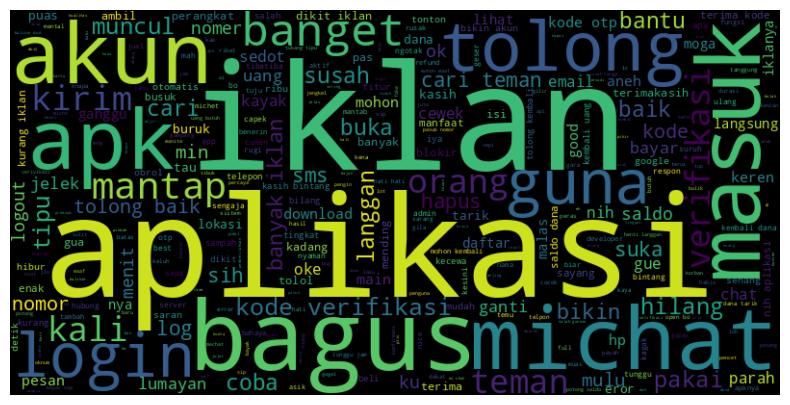

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(df['steming_data'].astype(str).tolist())

stopwords_wc = set(STOPWORDS)
stopwords_wc.update(['https', 'co', 'RT', '...', 'amp', 'ya'])

wc = WordCloud(stopwords=stopwords_wc, background_color="black", max_words=500, width=800, height=400)
wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

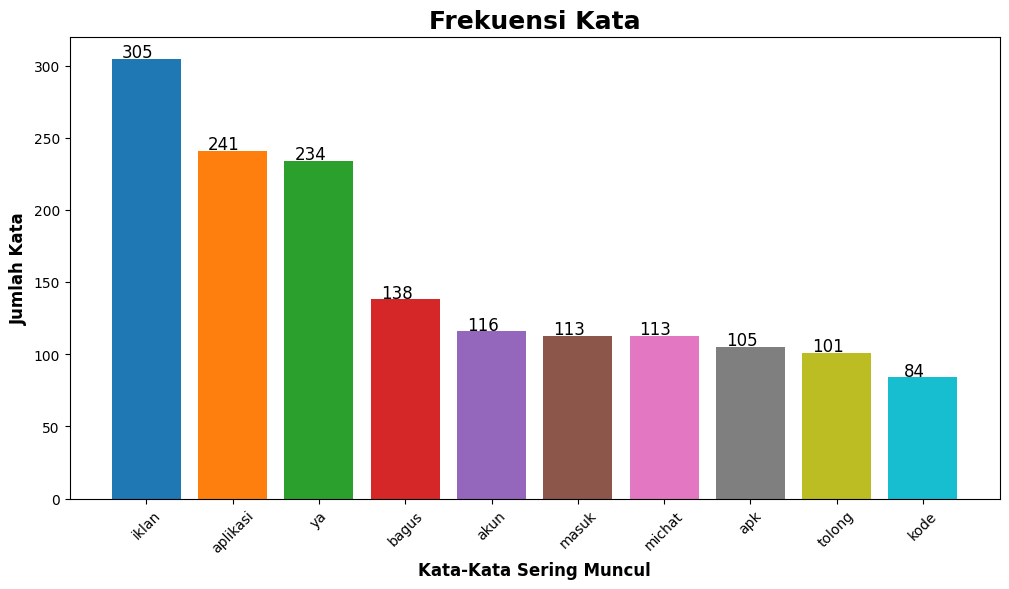

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

text = " ".join(df["steming_data"])
tokens = text.split()
word_counts = Counter(tokens)

top_words = word_counts.most_common(10)
word, count = zip(*top_words)

colors = plt.cm.tab10(range(len(word)))

plt.figure(figsize=(12, 6))
bars = plt.bar(word, count, color=colors)

plt.xlabel("Kata-Kata Sering Muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi Kata", fontsize=18, fontweight='bold')
plt.xticks(rotation=45)

for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), fontsize=12, color='black', ha='center')

plt.show()

In [ ]:
df.to_csv('Hasil_Preprocessing_Data.csv', encoding='utf8', index=False)

# ***PELABELAN DATA***

In [ ]:
import pandas as pd

data = pd.read_csv("Hasil_Preprocessing_Data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1389 entries, 0 to 1388
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              1389 non-null   object
 1   Username          1389 non-null   object
 2   Rating            1389 non-null   int64 
 3   Review Text       1389 non-null   object
 4   cleaning          1375 non-null   object
 5   case_folding      1375 non-null   object
 6   tokenize          1389 non-null   object
 7   stopword removal  1389 non-null   object
 8   steming_data      1355 non-null   object
dtypes: int64(1), object(8)
memory usage: 97.8+ KB


In [ ]:
df = data.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1355 entries, 0 to 1388
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              1355 non-null   object
 1   Username          1355 non-null   object
 2   Rating            1355 non-null   int64 
 3   Review Text       1355 non-null   object
 4   cleaning          1355 non-null   object
 5   case_folding      1355 non-null   object
 6   tokenize          1355 non-null   object
 7   stopword removal  1355 non-null   object
 8   steming_data      1355 non-null   object
dtypes: int64(1), object(8)
memory usage: 105.9+ KB


In [ ]:
data = pd.DataFrame(df[['Date','Username','Rating','steming_data']])
data.head(5)

Date                       Username  Rating  \
0  2026-01-31 18:11:34                        RayN -H       5   
1  2026-01-31 18:03:14                      Maz Adhie       5   
2  2026-01-31 17:58:19  Wahyu Pur Setiawan18 Wahyu MH       1   
4  2026-01-31 17:24:06                     Dawi Anjau       1   
5  2026-01-31 17:20:10                       Romadhon       4   

                         steming_data  
0                               ok ya  
1                            good job  
2                        banyak iklan  
4                         apk open bo  
5  cari lokasi dekat bisayg luar jawa

In [ ]:
import pandas as pd
import random

# Unduh kamus leksikon positif dan negatif dari URL yang diberikan
positive_lexicon = set(pd.read_csv("positive.tsv", sep="\t", header=None)[0])
negative_lexicon = set(pd.read_csv("negative.tsv", sep="\t", header=None)[0])

# Fungsi untuk menentukan sentimen dan menghitung skornya
def determine_sentiment(text):
    if isinstance(text, str):
        positive_count = sum(1 for word in text.split() if word in positive_lexicon)
        negative_count = sum(1 for word in text.split() if word in negative_lexicon)
        sentiment_score = positive_count - negative_count

        # Jika skor 0, ubah menjadi positif atau negatif secara acak
        if sentiment_score == 0:
            sentiment_score = random.choice([1, -1])

        if sentiment_score > 0:
            sentiment = "Positif"
        else:
            sentiment = "Negatif"

        return sentiment_score, sentiment
    return 0, "Netral"

# Tentukan sentimen dan skor untuk setiap ulasan
data[['Score', 'Sentiment']] = data['steming_data'].apply(lambda x: pd.Series(determine_sentiment(x)))

data.head(10)

Date                       Username  Rating  \
0   2026-01-31 18:11:34                        RayN -H       5   
1   2026-01-31 18:03:14                      Maz Adhie       5   
2   2026-01-31 17:58:19  Wahyu Pur Setiawan18 Wahyu MH       1   
4   2026-01-31 17:24:06                     Dawi Anjau       1   
5   2026-01-31 17:20:10                       Romadhon       4   
6   2026-01-31 16:33:27                 Samuel Yohanes       1   
7   2026-01-31 16:30:34                      Doni Doni       5   
8   2026-01-31 16:28:18                  Nazar Affandi       1   
9   2026-01-31 16:03:38            Al-faisah Al-faisah       5   
10  2026-01-31 15:57:11               lindo23 leowardo       3   

                          steming_data  Score Sentiment  
0                                ok ya      2   Positif  
1                             good job      1   Positif  
2                         banyak iklan      1   Positif  
4                          apk open bo     -1   Negatif  
5   cari lokasi dekat bisayg luar jawa     -1   Negatif  
6                 maaf lampau iklan ya      1   Positif  
7                                  oke      1   Positif  
8                        aplikasi tipu     -1   Negatif  
9                            keren sih     -1   Negatif  
10     tombol iklan tombol iklan muluu     -1   Negatif

/tmp/ipython-input-1910355637.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')


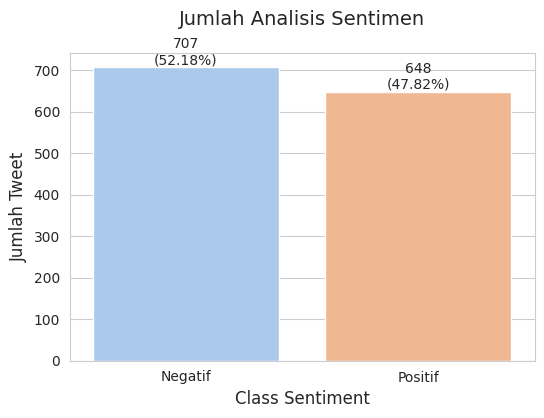

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_count = data['Sentiment'].value_counts()
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
plt.title('Jumlah Analisis Sentimen', fontsize=14, pad=20)
plt.xlabel('Class Sentiment', fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)

total = len(data['Sentiment'])

for i, count in enumerate(sentiment_count.values):
    percentage = f'{100 * count / total:.2f}%'
    ax.text(i, count + 0.10, f'{count}\n({percentage})', ha='center', va='bottom')

plt.show()

In [ ]:
data.to_csv('Hasil_Labelling_Data.csv', encoding='utf8', index=False)

**WORLDCLAUD**

In [ ]:
import pandas as pd

data = pd.read_csv("Hasil_Labelling_Data.csv")
data.head(5)

Date                       Username  Rating  \
0  2026-01-31 18:11:34                        RayN -H       5   
1  2026-01-31 18:03:14                      Maz Adhie       5   
2  2026-01-31 17:58:19  Wahyu Pur Setiawan18 Wahyu MH       1   
3  2026-01-31 17:24:06                     Dawi Anjau       1   
4  2026-01-31 17:20:10                       Romadhon       4   

                         steming_data  Score Sentiment  
0                               ok ya      2   Positif  
1                            good job      1   Positif  
2                        banyak iklan      1   Positif  
3                         apk open bo     -1   Negatif  
4  cari lokasi dekat bisayg luar jawa     -1   Negatif

In [ ]:
from wordcloud import WordCloud

sentimen_Negative = data[data['Sentiment'] == 'Negatif']['steming_data'].str.cat(sep=' ')
sentimen_Positive = data[data['Sentiment'] == 'Positif']['steming_data'].str.cat(sep=' ')

In [ ]:
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, random_state=42, max_font_size=100, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

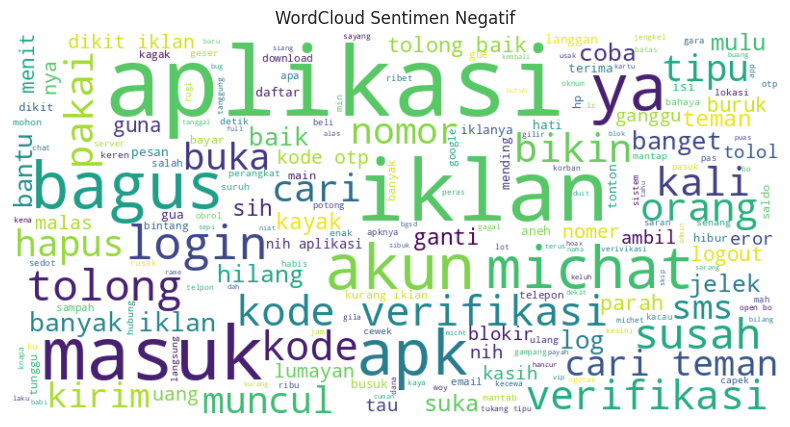

In [ ]:
create_wordcloud(sentimen_Negative, 'WordCloud Sentimen Negatif')

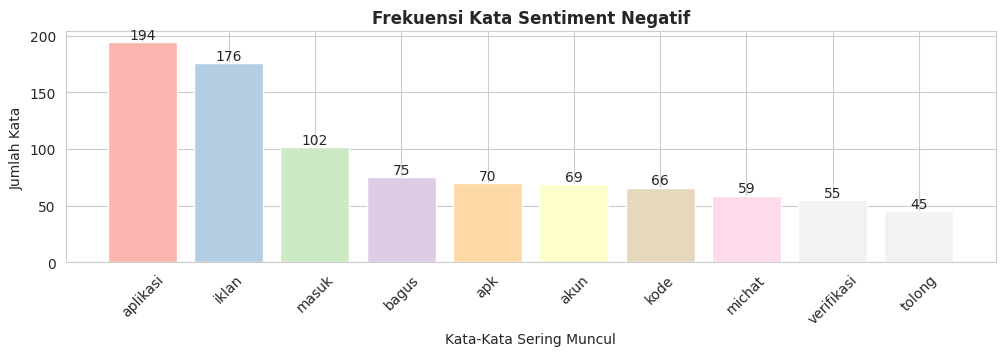

In [ ]:
from collections import Counter
from wordcloud import STOPWORDS

text = sentimen_Negative
stopwards = set(STOPWORDS)
stopwards.update(['https', 'co', 'lu', 'deh', 'ya', 'sih'])

tokens = [word for word in text.split() if word not in stopwards]
word_counts = Counter(tokens)
top_words = word_counts.most_common(10)
word, count = zip(*top_words)

plt.figure(figsize=(12, 3))
colors = plt.cm.Pastel1(range(len(word)))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata-Kata Sering Muncul", fontsize=10)
plt.ylabel("Jumlah Kata", fontsize=10)
plt.title("Frekuensi Kata Sentiment Negatif", fontsize=12, fontweight='bold')
plt.xticks(rotation=45)

for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), num, ha='center', va='bottom')

plt.show()

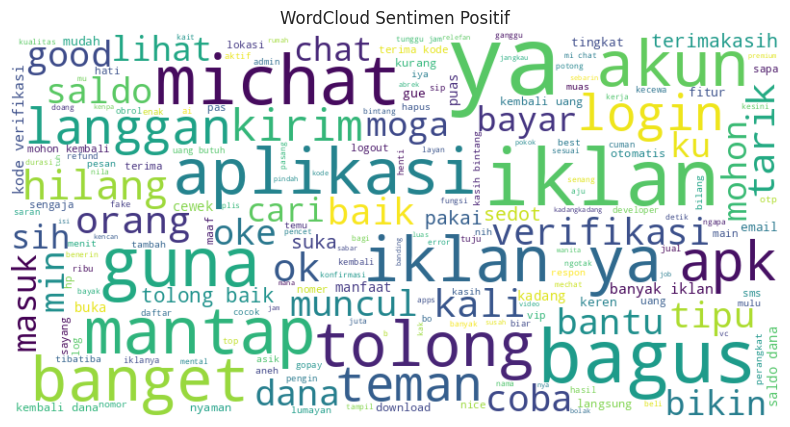

In [ ]:
create_wordcloud(sentimen_Positive, 'WordCloud Sentimen Positif')

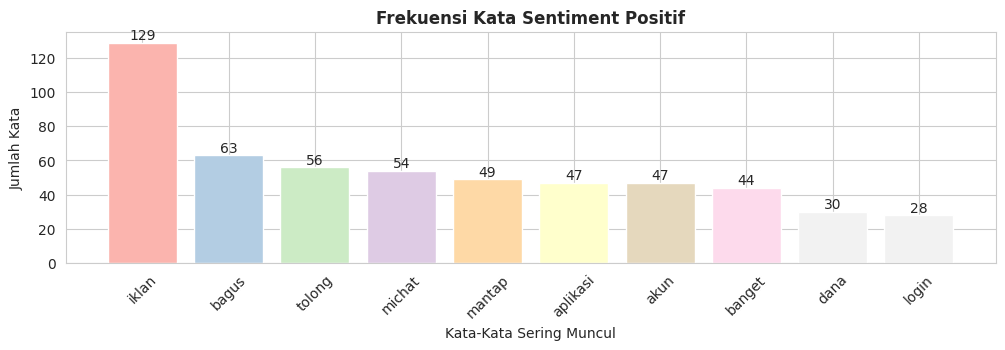

In [ ]:
from collections import Counter
from wordcloud import STOPWORDS

text = sentimen_Positive
stopwards = set(STOPWORDS)
stopwards.update(['https', 'co', 'lu', 'apk', 'ya', 'guna'])

tokens = [word for word in text.split() if word not in stopwards]
word_counts = Counter(tokens)
top_words = word_counts.most_common(10)
word, count = zip(*top_words)

plt.figure(figsize=(12, 3))
colors = plt.cm.Pastel1(range(len(word)))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata-Kata Sering Muncul", fontsize=10)
plt.ylabel("Jumlah Kata", fontsize=10)
plt.title("Frekuensi Kata Sentiment Positif", fontsize=12, fontweight='bold')
plt.xticks(rotation=45)

for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), num, ha='center', va='bottom')

plt.show()

# ***SPLITTING DATASET***

In [ ]:
data = pd.read_csv("Hasil_Labelling_Data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1355 entries, 0 to 1354
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          1355 non-null   object
 1   Username      1355 non-null   object
 2   Rating        1355 non-null   int64 
 3   steming_data  1355 non-null   object
 4   Score         1355 non-null   int64 
 5   Sentiment     1355 non-null   object
dtypes: int64(2), object(4)
memory usage: 63.6+ KB


In [ ]:
df = data.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1355 entries, 0 to 1354
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          1355 non-null   object
 1   Username      1355 non-null   object
 2   Rating        1355 non-null   int64 
 3   steming_data  1355 non-null   object
 4   Score         1355 non-null   int64 
 5   Sentiment     1355 non-null   object
dtypes: int64(2), object(4)
memory usage: 63.6+ KB


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_final['steming_data'],
    df_final['Sentiment'],
    test_size=0.2,
    random_state=42
)

In [ ]:
# SIMPAN DATA LATIH KE FILE
train_set = pd.DataFrame({'text': X_train, 'sentiment': y_train})
train_set.to_csv('train_data.csv', index=False)

In [ ]:
# SIMPAN DATA UJI KE FILE
test_set = pd.DataFrame({'text': X_test, 'sentiment': y_test})
test_set.to_csv('test_data.csv', index=False)

In [ ]:
# MENAMPILKAN INFORMASI JUMLAH DATA
print(f'Jumlah Data Latih: {len(X_train)}')
print(f'Jumlah Data Uji: {len(X_test)}')

Jumlah Data Latih: 1084
Jumlah Data Uji: 271


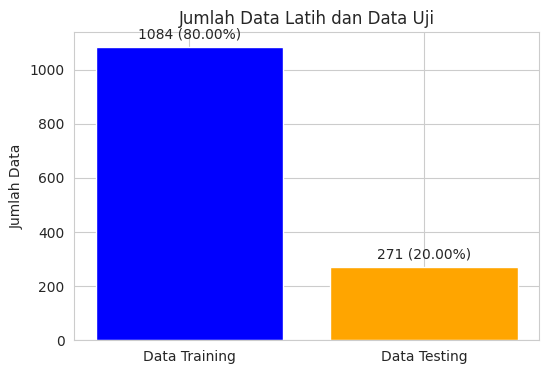

In [ ]:
import matplotlib.pyplot as plt

train_size = len(X_train)
test_size = len(X_test)

plt.figure(figsize=(6, 4))
bars = plt.bar(['Data Training', 'Data Testing'], [train_size, test_size], color=['blue', 'orange'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 20,
             f'{height} ({height / (train_size + test_size) * 100:.2f}%)',
             ha='center', va='bottom')

plt.title('Jumlah Data Latih dan Data Uji')
plt.ylabel('Jumlah Data')
plt.show()

# ***NAIVE BAYES CLADIFIKASION (NBC)***

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1355 entries, 0 to 1354
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          1355 non-null   object
 1   Username      1355 non-null   object
 2   Rating        1355 non-null   int64 
 3   steming_data  1355 non-null   object
 4   Score         1355 non-null   int64 
 5   Sentiment     1355 non-null   object
dtypes: int64(2), object(4)
memory usage: 63.6+ KB


In [ ]:
df.head()

Date                       Username  Rating  \
0  2026-01-31 18:11:34                        RayN -H       5   
1  2026-01-31 18:03:14                      Maz Adhie       5   
2  2026-01-31 17:58:19  Wahyu Pur Setiawan18 Wahyu MH       1   
3  2026-01-31 17:24:06                     Dawi Anjau       1   
4  2026-01-31 17:20:10                       Romadhon       4   

                         steming_data  Score Sentiment  
0                               ok ya      2   Positif  
1                            good job      1   Positif  
2                        banyak iklan      1   Positif  
3                         apk open bo     -1   Negatif  
4  cari lokasi dekat bisayg luar jawa     -1   Negatif

In [ ]:
# Inisialisasi CountVectorizer
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

X = vectorizer.fit_transform(data['steming_data'])
features = vectorizer.get_feature_names_out()
df_tokens = pd.DataFrame(X.toarray(), columns=features)

df_tokens = df_tokens.rename(columns=lambda x: x + '_' if x in data.columns else x)
df_combined = pd.concat([df_tokens, data['Sentiment']], axis=1)

frequency_positive = df_combined[df_combined['Sentiment'] == 'Positif'].drop('Sentiment', axis=1).sum()
frequency_negative = df_combined[df_combined['Sentiment'] == 'Negatif'].drop('Sentiment', axis=1).sum()

sentiment_counts = data['Sentiment'].value_counts()
total_samples = len(data)
prior_probabilities = sentiment_counts / total_samples

print("Prior Probabilities:")
print(prior_probabilities)

Prior Probabilities:
Sentiment
Negatif    0.521771
Positif    0.478229
Name: count, dtype: float64


In [ ]:
# MENGHITUNG PROBABILITAS KONDISIONAL DENGAN SMOOTHING LAPLACE
total_positive = frequency_positive.sum()
total_negative = frequency_negative.sum()

probability_conditional_positive = (frequency_positive + 1) / (total_positive + len(features))
probability_conditional_negative = (frequency_negative + 1) / (total_negative + len(features))

print("Probability Conditional Positif:", probability_conditional_positive)
print("\nProbability Conditional Negatif:", probability_conditional_negative)

Probability Conditional Positif: abaaba    0.000487
abal      0.000243
abang     0.000487
abrek     0.000730
acc       0.000243
            ...   
yesss     0.000243
you       0.000243
yth       0.000487
zaman     0.000487
zina      0.000487
Length: 1437, dtype: float64

Probability Conditional Negatif: abaaba    0.000205
abal      0.000409
abang     0.000205
abrek     0.000205
acc       0.000409
            ...   
yesss     0.000409
you       0.000409
yth       0.000205
zaman     0.000205
zina      0.000205
Length: 1437, dtype: float64


In [ ]:
# MENGHITUNG PROBABILITAS DENGAN POSTERIOR
def calculate_posterior_probabilities(document):
    words = document.split()
    posterior_positive = prior_probabilities['Positif']
    posterior_negative = prior_probabilities['Negatif']

    for word in words:
        if word in probability_conditional_positive.index and word in probability_conditional_negative.index:
            posterior_positive *= probability_conditional_positive.get(word, 1)
            posterior_negative *= probability_conditional_negative.get(word, 1)
    return {'Positif': posterior_positive, 'Negatif': posterior_negative}

data['posterior_probabilities'] = data['steming_data'].apply(calculate_posterior_probabilities)
data.head()

Date                       Username  Rating  \
0  2026-01-31 18:11:34                        RayN -H       5   
1  2026-01-31 18:03:14                      Maz Adhie       5   
2  2026-01-31 17:58:19  Wahyu Pur Setiawan18 Wahyu MH       1   
3  2026-01-31 17:24:06                     Dawi Anjau       1   
4  2026-01-31 17:20:10                       Romadhon       4   

                         steming_data  Score Sentiment  \
0                               ok ya      2   Positif   
1                            good job      1   Positif   
2                        banyak iklan      1   Positif   
3                         apk open bo     -1   Negatif   
4  cari lokasi dekat bisayg luar jawa     -1   Negatif   

                             posterior_probabilities  
0  {'Positif': 8.610671315173223e-05, 'Negatif': ...  
1  {'Positif': 1.2746059512591937e-06, 'Negatif':...  
2  {'Positif': 5.1550729584260735e-05, 'Negatif':...  
3  {'Positif': 1.4889531676914408e-09, 'Negatif':...  
4  {'Positif': 2.5039139737845905e-20, 'Negatif':...

**NAIVE BAYES GAUSSIAN**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1355 entries, 0 to 1354
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          1355 non-null   object
 1   Username      1355 non-null   object
 2   Rating        1355 non-null   int64 
 3   steming_data  1355 non-null   object
 4   Score         1355 non-null   int64 
 5   Sentiment     1355 non-null   object
dtypes: int64(2), object(4)
memory usage: 63.6+ KB


In [ ]:
df.head()

Date                       Username  Rating  \
0  2026-01-31 18:11:34                        RayN -H       5   
1  2026-01-31 18:03:14                      Maz Adhie       5   
2  2026-01-31 17:58:19  Wahyu Pur Setiawan18 Wahyu MH       1   
3  2026-01-31 17:24:06                     Dawi Anjau       1   
4  2026-01-31 17:20:10                       Romadhon       4   

                         steming_data  Score Sentiment  
0                               ok ya      2   Positif  
1                            good job      1   Positif  
2                        banyak iklan      1   Positif  
3                         apk open bo     -1   Negatif  
4  cari lokasi dekat bisayg luar jawa     -1   Negatif

**NAIVE BAYES MULTINOMIAL**

GaussianNB Results
Confusion Matrix (GaussianNB):
[[ 49  96]
 [ 20 106]]

Classification Report (GaussianNB):
              precision    recall  f1-score   support

     Negatif       0.71      0.34      0.46       145
     Positif       0.52      0.84      0.65       126

    accuracy                           0.57       271
   macro avg       0.62      0.59      0.55       271
weighted avg       0.62      0.57      0.55       271

Accuracy (GaussianNB): 0.5720


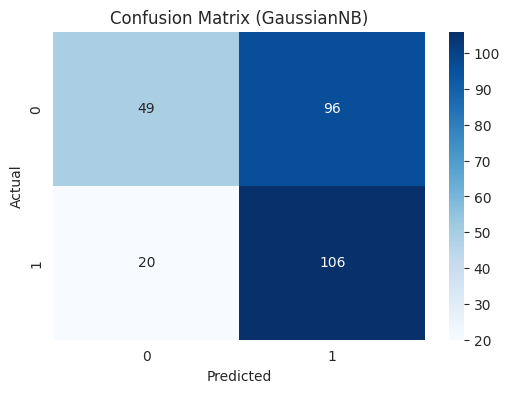

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(data['steming_data']).toarray()
y = data['Sentiment']

X_train_gnb, X_test_gnb, y_train_gnb, y_test_gnb = train_test_split(X, y, test_size=0.2, random_state=42)
gnb = GaussianNB()
gnb.fit(X_train_gnb, y_train_gnb)
y_pred_gnb = gnb.predict(X_test_gnb)

print("GaussianNB Results")
print("==================")
print("Confusion Matrix (GaussianNB):")
print(confusion_matrix(y_test_gnb, y_pred_gnb))
print("\nClassification Report (GaussianNB):")
print(classification_report(y_test_gnb, y_pred_gnb))
print(f"Accuracy (GaussianNB): {accuracy_score(y_test_gnb, y_pred_gnb):.4f}")

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_gnb, y_pred_gnb), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (GaussianNB)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**NAIVE BAYES BERNOULLI**

MultinomialNB Results
[[114  31]
 [ 52  74]]

Classification Report (MultinomialNB):
              precision    recall  f1-score   support

     Negatif       0.69      0.79      0.73       145
     Positif       0.70      0.59      0.64       126

    accuracy                           0.69       271
   macro avg       0.70      0.69      0.69       271
weighted avg       0.70      0.69      0.69       271

Accuracy (MultinomialNB): 0.6937


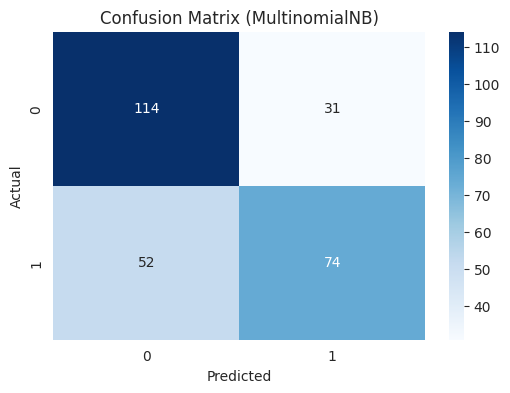

steming_data   Actual Predicted
49                                     kadang cari guna  Positif   Positif
1096                        sedot otomatis ngembaliinya  Positif   Positif
494   suka ya main mi chat nih hilang akun hilang to...  Positif   Positif
1110                                       kebaya iklan  Positif   Positif
922                                               knhna  Positif   Negatif

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(data['steming_data']).toarray()
y = data['Sentiment']

X_train_mnb, X_test_mnb, y_train_mnb, y_test_mnb = train_test_split(X, y, test_size=0.2, random_state=42)

mnb = MultinomialNB()
mnb.fit(X_train_mnb, y_train_mnb)

y_pred_mnb = mnb.predict(X_test_mnb)

print("MultinomialNB Results")
print(confusion_matrix(y_test_mnb, y_pred_mnb))
print("\nClassification Report (MultinomialNB):")
print(classification_report(y_test_mnb, y_pred_mnb))
print(f"Accuracy (MultinomialNB): {accuracy_score(y_test_mnb, y_pred_mnb):.4f}")

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_mnb, y_pred_mnb), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (MultinomialNB)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

results_mnb = pd.DataFrame({
    'steming_data': data.loc[y_test_mnb.index, 'steming_data'],
    'Actual': y_test_mnb,
    'Predicted': y_pred_mnb
})
results_mnb.to_csv('Hasil_pred_MultinomialNB.csv', encoding='utf8', index=False)
results_mnb.head()

BernoulliNB Results
Confusion Matrix (BernoulliNB):
[[95 50]
 [30 96]]

Classification Report (BernoulliNB):
              precision    recall  f1-score   support

     Negatif       0.76      0.66      0.70       145
     Positif       0.66      0.76      0.71       126

    accuracy                           0.70       271
   macro avg       0.71      0.71      0.70       271
weighted avg       0.71      0.70      0.70       271

Accuracy (BernoulliNB): 0.7048


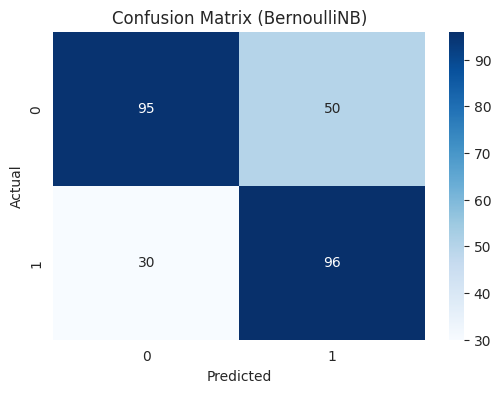


Actual vs Predicted (BernoulliNB):
                                           steming_data   Actual Predicted
49                                     kadang cari guna  Positif   Positif
1096                        sedot otomatis ngembaliinya  Positif   Positif
494   suka ya main mi chat nih hilang akun hilang to...  Positif   Positif
1110                                       kebaya iklan  Positif   Positif
922                                               knhna  Positif   Positif


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['steming_data']).toarray()
y = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)

conf_matrix_bnb = confusion_matrix(y_test, y_pred_bnb)
class_report_bnb = classification_report(y_test, y_pred_bnb)
accuracy_bnb = accuracy_score(y_test, y_pred_bnb)

print("BernoulliNB Results")
print("==================")
print("Confusion Matrix (BernoulliNB):")
print(conf_matrix_bnb)
print("==================")
print("\nClassification Report (BernoulliNB):")
print(class_report_bnb)
print("==================")
print(f"Accuracy (BernoulliNB): {accuracy_bnb:.4f}")
print("==================")

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_bnb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (BernoulliNB)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

results_bnb = pd.DataFrame({
    'steming_data': df.loc[y_test.index, 'steming_data'],
    'Actual': y_test,
    'Predicted': y_pred_bnb
})

results_bnb.to_csv('Hasil_pred_BernoulliNB.csv', encoding='utf8', index=False)
print("\nActual vs Predicted (BernoulliNB):")
print(results_bnb.head())

# ***RATING***

In [ ]:
data = pd.read_csv("Hasil_Labelling_Data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1355 entries, 0 to 1354
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          1355 non-null   object
 1   Username      1355 non-null   object
 2   Rating        1355 non-null   int64 
 3   steming_data  1355 non-null   object
 4   Score         1355 non-null   int64 
 5   Sentiment     1355 non-null   object
dtypes: int64(2), object(4)
memory usage: 63.6+ KB


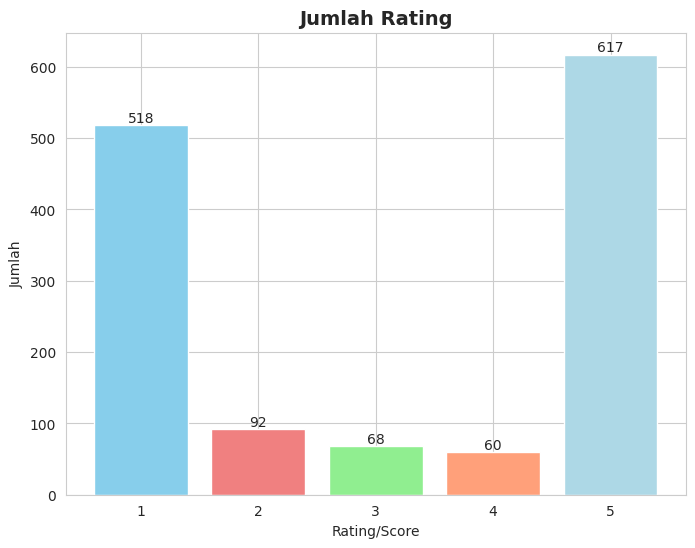

In [ ]:
import matplotlib.pyplot as plt

rating_counts = data['Rating'].value_counts()
rating_counts = rating_counts.sort_index()

colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightblue']
plt.figure(figsize=(8, 6))
bars = plt.bar(rating_counts.index, rating_counts.values, color=colors)

plt.title('Jumlah Rating', fontsize=14, fontweight='bold')
plt.xlabel('Rating/Score')
plt.ylabel('Jumlah')
plt.xticks(rating_counts.index)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2,
             height,
             str(int(height)),
             ha='center', va='bottom')
plt.show()